In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional,SpatialDropout1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import pandas
from keras.utils import plot_model

Using TensorFlow backend.


In [2]:
#parametros para vocabulario y la red
vocab_size = 15000 # make the top list of words (common words)
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # OOV = Out of Vocabulary
training_portion = .8
epochs = 10
batch_size = 64

In [3]:
#lectura del dataset
DataSet=pandas.read_csv("c:\\AttributionDL\\AttributionDataset.csv", delimiter = ',')
#los datos son reordenados al azar
DataSet=DataSet.sample(frac = 1).reset_index(drop=True)#to shuffle your dataframe in-place and reset the index

In [4]:
print (DataSet)

                Autor                                              Texto
0           MarkTwain  You're educated, too, they say--can read and\r...
1           MarkTwain  It's the first one I've seen this year." "Say,...
2    FrederickMarryat  You would scarcely believe that the fibers of ...
3        GeorgeDonald  To be right is no adjunct of completeness; it ...
4     BoothTarkington  she asked, breathlessly. "What's the padlock f...
..                ...                                                ...
955   BoothTarkington  The word is\r\n'potent'." Ramsey flopped his h...
956      GeorgeVaizey  She Is getting up--_pink_ this time! I can see...
957         MarkTwain  TOM SAWYER ABROAD\r\n\r\nBy Mark Twain\r\n\r\n...
958  FrederickMarryat  The Pacha of Many Tales, by Captain Marryat. C...
959         MarkTwain  Come, this one's interesting. Why, Berkeley, h...

[960 rows x 2 columns]


In [5]:
articles = []
labels = []
#se extraen los datos a cada una de las listas
for i in range(len(DataSet)) : 
    labels.append(DataSet.loc[i, "Autor"])
    articles.append(DataSet.loc[i, "Texto"])

In [6]:
#se crea el vocabulario
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~ ', lower=True, split=' ', char_level=False)
tokenizer.fit_on_texts(articles)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 108091 unique tokens.


In [7]:
#los textos se convierten a numeros 
TextToSequencesArticles = tokenizer.texts_to_sequences(articles) 
#despues se fijan a una misma longitud (200)
TextToSequencesArticles = pad_sequences(TextToSequencesArticles, maxlen=max_length)
print('Shape of data tensor:', TextToSequencesArticles.shape)
#las etiquetas de autor son convertidas a one-hot encode
CategoricalToNumbersLabels = pandas.get_dummies(labels)
print('Shape of label tensor:', CategoricalToNumbersLabels.shape)

Shape of data tensor: (960, 200)
Shape of label tensor: (960, 7)


In [8]:
#creando conjuntos de entrenamiento y prueba
train_articles,validation_articles,train_labels,validation_labels = train_test_split(TextToSequencesArticles,CategoricalToNumbersLabels, test_size = 0.20, random_state = 42)
print(train_articles.shape,train_labels.shape)
print(validation_articles.shape,validation_labels.shape)

(768, 200) (768, 7)
(192, 200) (192, 7)


In [26]:
embedding_dim = 100 #ESTA CELDA SE HABILITA O DESABILITA PARA PROBAR UNA U OTRA CONFIGURACION DE RED

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(7, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 100)          1500000   
_________________________________________________________________
conv1d (Conv1D)              (None, 196, 128)          64128     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 77        
Total params: 1,565,495
Trainable params: 1,565,495
Non-trainable params: 0
_________________________________________________________________


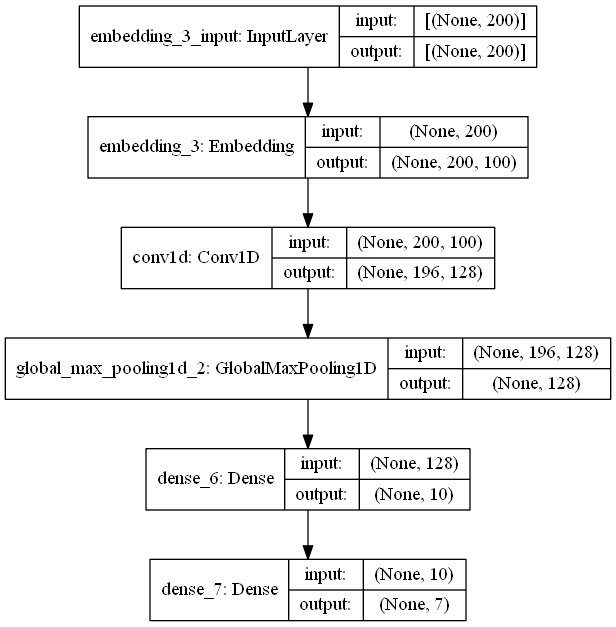

In [27]:
#graficando el modelo
tf.keras.utils.plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [28]:
#compilando la red
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
#entrenando la red
#history = model.fit(train_articles, train_labels, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
#history = model.fit(train_articles, train_labels, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
history = model.fit(train_articles, train_labels, epochs=epochs,validation_data=(validation_articles,validation_labels))

Epoch 1/10
24/24 [==============================] - 2s 64ms/step - loss: 1.9422 - accuracy: 0.1508 - val_loss: 1.9397 - val_accuracy: 0.1667
Epoch 2/10
24/24 [==============================] - 1s 59ms/step - loss: 1.8711 - accuracy: 0.3332 - val_loss: 1.9332 - val_accuracy: 0.1823
Epoch 3/10
24/24 [==============================] - 1s 60ms/step - loss: 1.7735 - accuracy: 0.4471 - val_loss: 1.9116 - val_accuracy: 0.1875
Epoch 4/10
24/24 [==============================] - 2s 72ms/step - loss: 1.6417 - accuracy: 0.4521 - val_loss: 1.8875 - val_accuracy: 0.2188
Epoch 5/10
24/24 [==============================] - 1s 55ms/step - loss: 1.4709 - accuracy: 0.4578 - val_loss: 1.8606 - val_accuracy: 0.2396
Epoch 6/10
24/24 [==============================] - 1s 53ms/step - loss: 1.2420 - accuracy: 0.5422 - val_loss: 1.8153 - val_accuracy: 0.2812
Epoch 7/10
24/24 [==============================] - 1s 54ms/step - loss: 1.0029 - accuracy: 0.6204 - val_loss: 1.7200 - val_accuracy: 0.3490
Epoch 8/10
24

In [30]:
#evaluando la red
accr = model.evaluate(validation_articles,validation_labels)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

6/6 [==============================] - 0s 10ms/step - loss: 1.5364 - accuracy: 0.4010
Test set
  Loss: 1.536
  Accuracy: 0.401
